In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df=pd.read_csv("FeedGrains.csv")

In [3]:
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,8,Aug,0.69
1,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,9,Sep,0.69
2,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,10,Oct,0.70
3,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,11,Nov,0.76
4,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,12,Dec,0.76


In [4]:
df.tail()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
463113,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),2,Corn,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,7,Jul,0.631104
463114,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1991,3,Annual,114,MY Oct-Sep,10.000000
463115,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1992,3,Annual,114,MY Oct-Sep,17.000000
463116,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2018,3,Annual,31,MY Sep-Aug,0.000306
463117,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,5,May,0.000306


In [5]:
# Display the basic informations about the dataset and finding the null values
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463118 entries, 0 to 463117
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                463118 non-null  int64  
 1   SC_Group_Desc              463118 non-null  object 
 2   SC_GroupCommod_ID          455269 non-null  float64
 3   SC_GroupCommod_Desc        455269 non-null  object 
 4   SC_Geography_ID            463118 non-null  int64  
 5   SortOrder                  463118 non-null  float64
 6   SC_GeographyIndented_Desc  463118 non-null  object 
 7   SC_Commodity_ID            463118 non-null  int64  
 8   SC_Commodity_Desc          463118 non-null  object 
 9   SC_Attribute_ID            463118 non-null  int64  
 10  SC_Attribute_Desc          463118 non-null  object 
 11  SC_Unit_ID                 463118 non-null  int64  
 12  SC_Unit_Desc               463118 non-null  object 
 13  Year_ID                    46

SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_ID            7849
SC_GroupCommod_Desc          7849
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64

In [6]:
# Showing described info
df.describe()

,SC_Group_ID,SC_GroupCommod_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,Timeperiod_ID,Amount
count,463118.000000,455269.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,4.631180e+05
mean,2.836886,12.546000,88.719387,76.592939,34.930059,22.775070,7.674871,2002.218568,1.388320,15.897797,6.591591e+05
std,0.756613,3.138582,82.007304,78.348583,34.568156,6.034082,3.900039,13.226970,0.771797,26.082172,2.326463e+07
min,1.000000,8.000000,1.000000,0.020000,1.000000,1.000000,1.000000,1866.000000,1.000000,1.000000,-6.353320e+02
25%,3.000000,10.000000,30.000000,1.600000,2.000000,19.000000,7.000000,1995.000000,1.000000,4.000000,8.882811e-02
50%,3.000000,12.000000,51.000000,57.500000,14.000000,24.000000,7.000000,2004.000000,1.000000,8.000000,2.275850e+00
75%,3.000000,12.000000,141.000000,150.000000,76.000000,24.000000,7.000000,2012.000000,1.000000,12.000000,4.439208e+01
max,7.000000,20.000000,339.000000,285.000000,212.000000,61.000000,46.000000,2019.000000,3.000000,137.000000,2.597865e+09


In [7]:
df.describe(include='object')

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
count,463118,455269,463118,463118,463118,463118,463118,463118
unique,7,13,273,84,43,23,3,48
top,Exports and imports,Corn,United States,Corn,"Exports, from U.S. to specified destination","1,000 metric tons",Monthly,MY Sep-Aug
freq,379129,218939,41983,78913,248329,366132,366211,32010


In [8]:
print(df.shape)

(463118, 19)


In [9]:
df.duplicated().sum()

0

In [10]:
print(df.columns)

Index(['SC_Group_ID', 'SC_Group_Desc', 'SC_GroupCommod_ID',
       'SC_GroupCommod_Desc', 'SC_Geography_ID', 'SortOrder',
       'SC_GeographyIndented_Desc', 'SC_Commodity_ID', 'SC_Commodity_Desc',
       'SC_Attribute_ID', 'SC_Attribute_Desc', 'SC_Unit_ID', 'SC_Unit_Desc',
       'Year_ID', 'SC_Frequency_ID', 'SC_Frequency_Desc', 'Timeperiod_ID',
       'Timeperiod_Desc', 'Amount'],
      dtype='object')


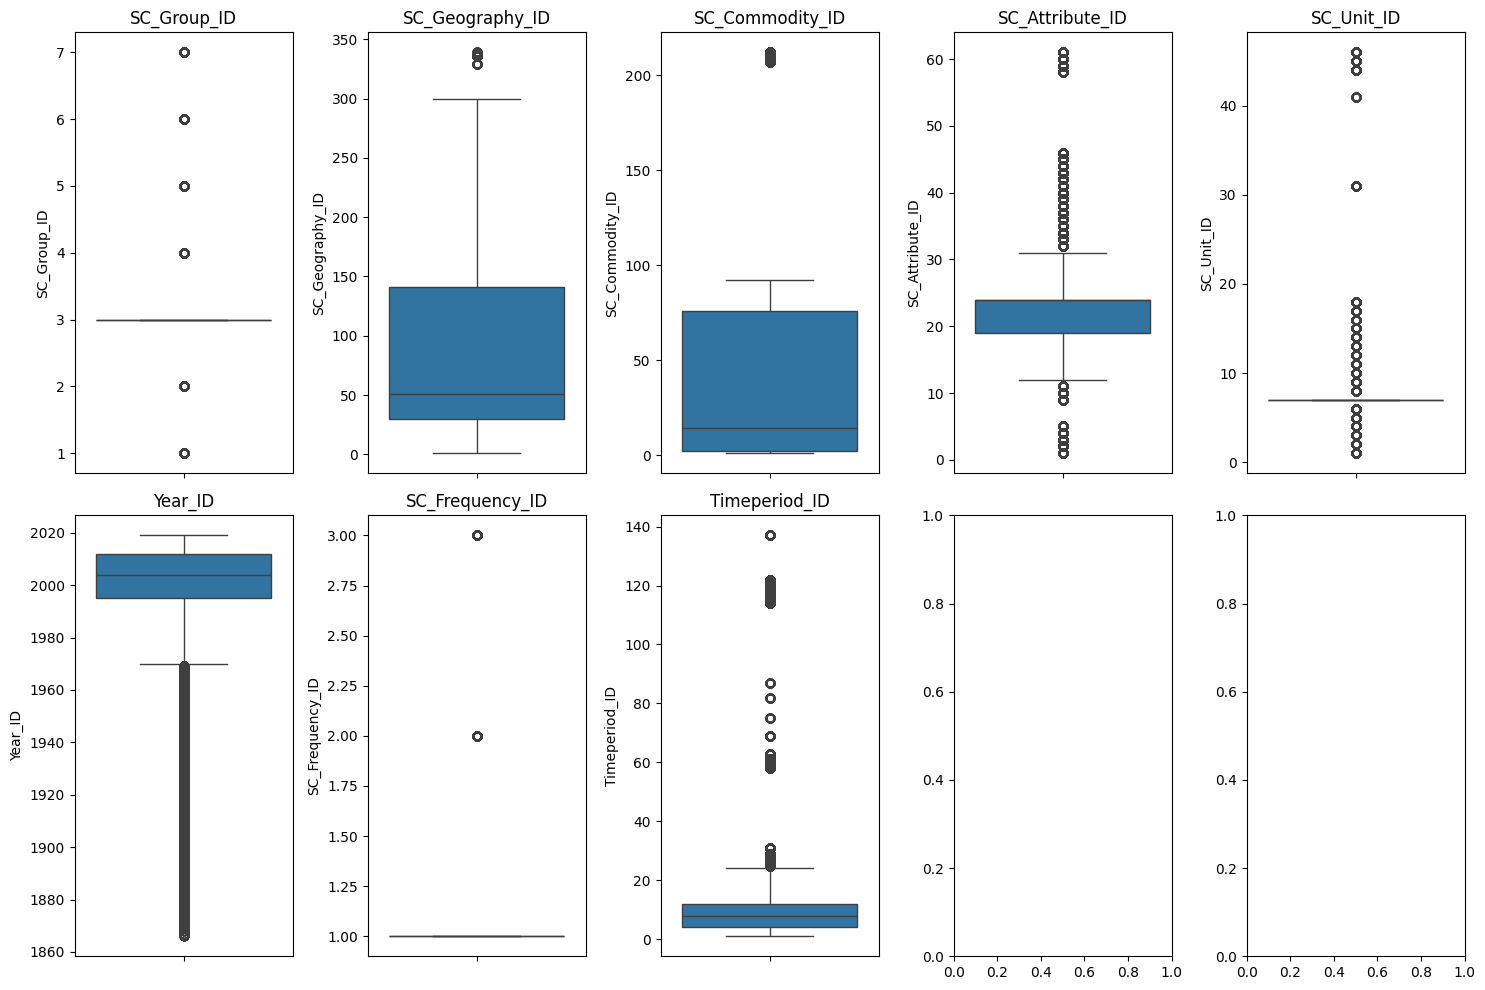

In [11]:
numerical_cols = df.select_dtypes(include=['int64'])
 
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
axes = axes.flatten()
 
# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):

    sns.boxplot(y=df[column], ax=axes[i])

    axes[i].set_title(column)
plt.tight_layout()
plt.show()
 